In [1]:
# setup notebook
# notebook formatting 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# pretty print all cell's output and not just the last one
# "last_expr" required to suppress matplotlib text output, which appears with "all" param
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# enable split cells in notebook
# if not installed:  pip install jupyter_contrib_nbextensions; then repeat this cmd
!jupyter nbextension enable splitcell/splitcell 

Enabling notebook extension splitcell/splitcell...
      - Validating: ok


In [2]:
# imports
import os
import random
import numpy as np
from sklearn.linear_model import LinearRegression  # for curve fit

# visualization - imports and setting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
print(plt.get_backend())  # swap to terminal to show separate renderer

# for widgets below
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from pathlib import Path

module://ipykernel.pylab.backend_inline


In [3]:
%%html
<style>
table {float:left}
</style>

# Matplotlib
<br><br><br><br><br><br>
<img src="./images/matplotlib_logo2.webp" alt="Approximation of Napoleon Russian Campaign" title="European context of Napoleon Russian Campaign" style="float:right; width:90%"/>


# Matplotlib - background

- "grandparent of python visualization packages"
- mature / grown organically since 2003
<br><br>
- very powerful / very complex
<br><br>
- "sometimes difficult"
- multiple API
- documentation is inconsistent
- stackoverflow / web examples vary widely in style



# Python
"There should be one-- and preferably only one --obvious way to do it." 
<br><br>
# Matplotlib
"When viewing this documentation and examples, you will find different coding styles and usage patterns.<br> These styles are perfectly valid and have their pros and cons."

# Matplotlib - important technical stuff

- has several different APIs<br>
  -- object oriented API (e.g. fig, ax)  **--> core, full control and compositionality but complex and highly verbose<br>**
  -- pyplot API (e.g. plt) **--> simpler, not compositional, less flexible, MATLAB based**<br>
  -- pylab API **--> do NOT use, imports numpy into global  namespace)**<br><br>
  
- [matplotlib home page](https://matplotlib.org/)
- ["Matplotlib usage page"](https://matplotlib.org/faq/usage_faq.html)<br><br>
- **you need to be familiar with matplotlib**

# Your Frame of Reference:  *Figure, Axes, Axis...*<br>
<table> <tr> <th style="width:600px"></th> <th></th> </tr> 
    <tr> 
        <td><img src="./images/matplotlib_anatomy1.webp" alt="Matplotlib - Parts of a Figure" title="Matplotlib - Parts of a Figure"/></td>
        <td style="text-align:left;vertical-align:top; font-size: 200%"><br><br><strong><i><br><br>- Figure - </i></strong>entire drawing object, contains plots >=1 (confusingly called `axes`).<br><br> <br>
            <strong><i>- Axes - </i></strong>what you normally think of as "a plot" (aka `sub-plots`)<br><br><br>
            <strong><i>- Axis - </i></strong>the horizontal and vertical axis lines (e.g. X and Y) on a subplot<br><br><br>
            <strong><i>- Artist - </i></strong>core object, less frequently referenced in docs; everything you can see in a figure is an `artist` object<br><br> </td> <br><br><br>
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"></td>
    </tr>
    <tr>
        <td><strong>[credit: Matplotlib docs](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)</strong></td>
    </tr>
</table>

# Let's simplify!<br>
<strong>[credit: Matplotlib docs](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)</strong><br>
<img src="./images/matplotlib_simplified_fig_map.webp" alt="Matplotlib Simplified View - Parts of a Figure" title="Matplotlib - Parts of a Figure" style="float:center; width:30%"/>

# Two Matplotlib APIs<br>

<table style="width:85%; float:center"> 
    <tr> 
        <th style="text-align:center; font-size: 150%">Object Oriented API</th> 
            <th style="text-align:center; font-size: 150%">Pyplot API</th> 
    </tr> 
    <tr>
        <td style="text-align:left; vertical-align:top; font-size: 150%">
            - have time<br><br>
            - need full control over every element<br><br>
            - you have a good design<br><br>
            - explicit - want lots of code<br><br>
        </td>
        <td style="text-align:left; vertical-align:top; font-size: 150%">
            - need quick plots<br><br>
            - can live with limitations - limits to customize<br><br>
            - aesthetics not as important<br><br>
            - implicit - don't want code<br><br>
            - maintains state across calls
        </td>
     <tr>
        <td style="text-align:left; font-size: 150%">key differences</td>
        <td></td>
     <tr>
         <td style="text-align:left; font-size: 150%"><i>syntax:</i>  <b>fig, ax</b></td>
         <td style="text-align:left; font-size: 150%"><b>plt</b><br><br></td>
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
</table>

[7 8 5 8 1 8 5 6 4 7]
[5 9 8 9 5 3 2 5 4 3]


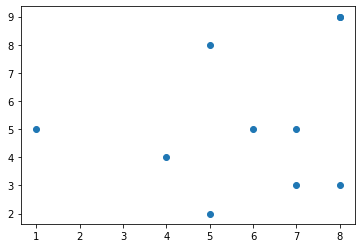

In [4]:
# Object Oriented API

x = np.random.randint(1, 10, 10, np.int)
y = np.random.randint(1, 10, 10, np.int)
print(x)
print(y)

# simple example
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y)


[7 8 5 8 1 8 5 6 4 7]
[5 9 8 9 5 3 2 5 4 3]


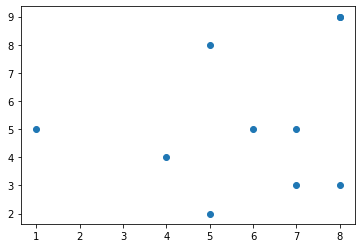

In [5]:
# Pyplot API



print(x)
print(y)

# same simple example
import matplotlib.pyplot as plt

plt.scatter(x,y)



In [6]:
# that wasn't so bad... what's the big deal?


[7 8 5 8 1 8 5 6 4 7]
[5 9 8 9 5 3 2 5 4 3]


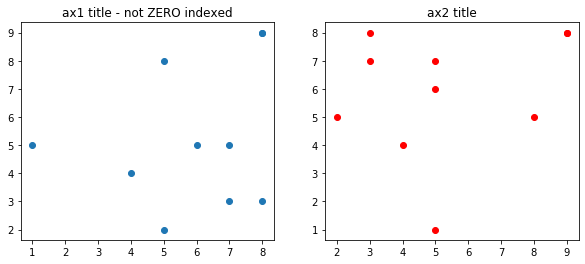

In [7]:
# Object Oriented API
print(x)
print(y)

# slightly more complex example
fig2 = plt.figure(figsize=(10,4), facecolor='white')
ax1 = plt.subplot(1, 2, 1);
ax1.scatter(x, y);
ax1.axes.set_title("ax1 title - not ZERO indexed");
ax2 = plt.subplot(1, 2, 2);
ax2.scatter(y, x, color="red")
ax2.axes.set_title("ax2 title");
# note!  `ax` ==> `axes`
#  `ax` is most common usage


[7 8 5 8 1 8 5 6 4 7]
[5 9 8 9 5 3 2 5 4 3]


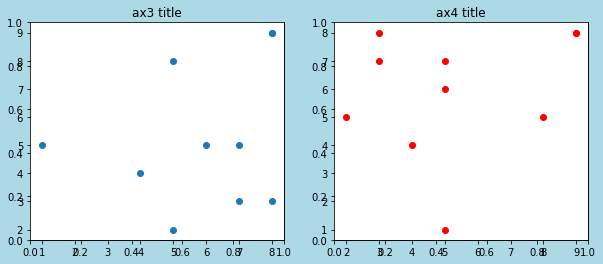

In [8]:
# Object Oriented API - yet another format 
print(x)
print(y)

# slightly more complex example
fig5, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(10,4), facecolor='lightblue')
ax3 = fig5.add_subplot(1,2,1);  # syntax = `num rows, num cols, axes num`
ax3.scatter(x, y);
ax3.axes.set_title("ax3 title");
ax4 = fig5.add_subplot(1,2,2)
ax4.scatter(y, x, color="red")
ax4.axes.set_title("ax4 title");


[7 8 5 8 1 8 5 6 4 7]
[5 9 8 9 5 3 2 5 4 3]


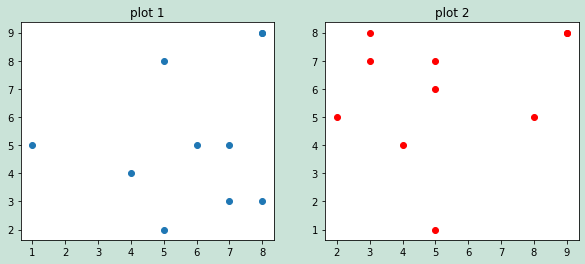

In [9]:
# Pyplot API
print(x)
print(y)

# same example in Pyplot
fig5 = plt.subplots(1,2, figsize=(10, 4), facecolor='#cae3d8')
plt.subplot(1, 2, 1, title="plot 1")
plt.scatter(x,y)         # matplotlib keeps track of the current object
plt.subplot(1, 2, 2, title="plot 2")
plt.scatter(y, x, color="red");


<Figure size 432x288 with 0 Axes>

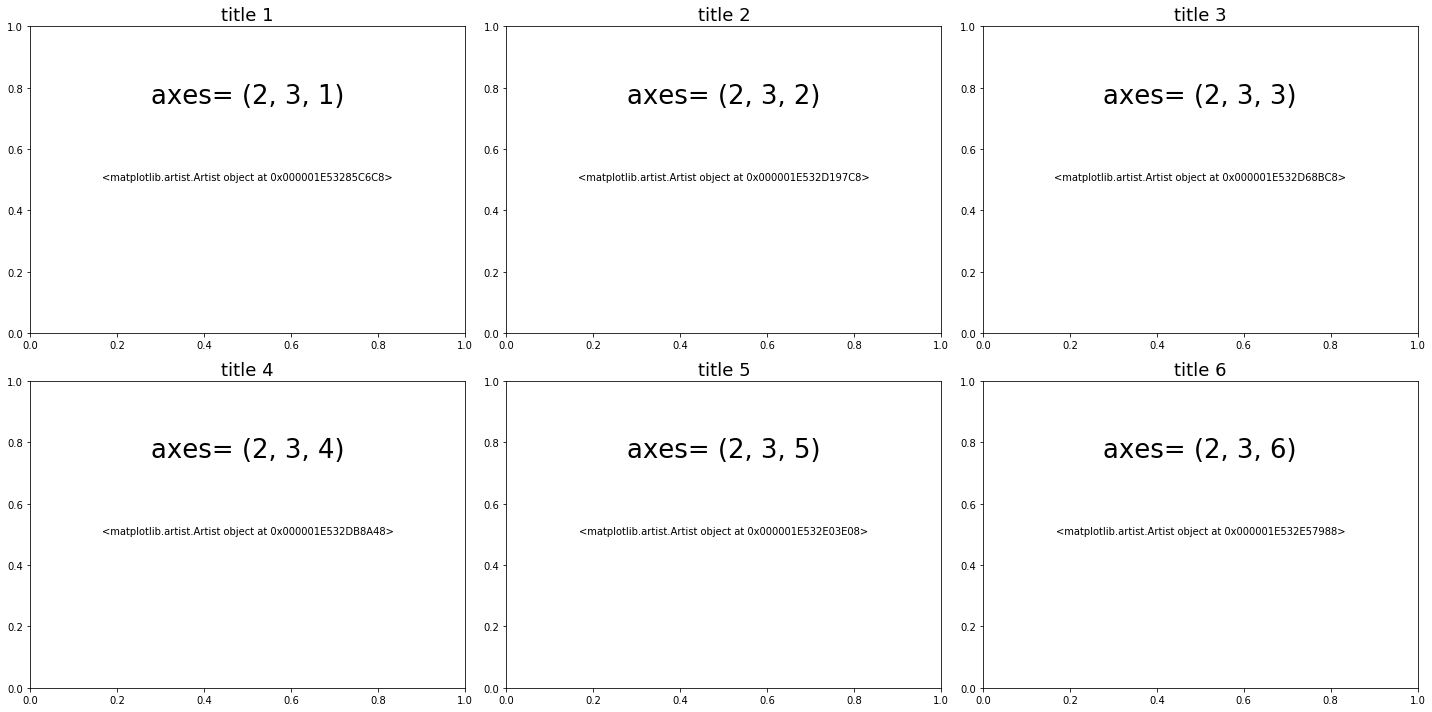

In [10]:
# pyplot - keeps track of the current figure, applies changes to that object
fig = plt.figure()
fig, ax_list = plt.subplots(2,3, figsize=(20,10))

for i in range (1, 7):
    plt.subplot(2, 3, i)
    plt.title(f"title {i}", fontsize=18)
    plt.text(0.5, 0.75, f"axes= (2, 3, {i})", ha="center", fontsize = 26)
    plt.text(0.5, 0.5, str(plt.Artist()), ha="center", fontsize = 10)
    plt.tight_layout()


Text(0, 0.5, 'axes 3 -Y')

<Figure size 432x288 with 0 Axes>

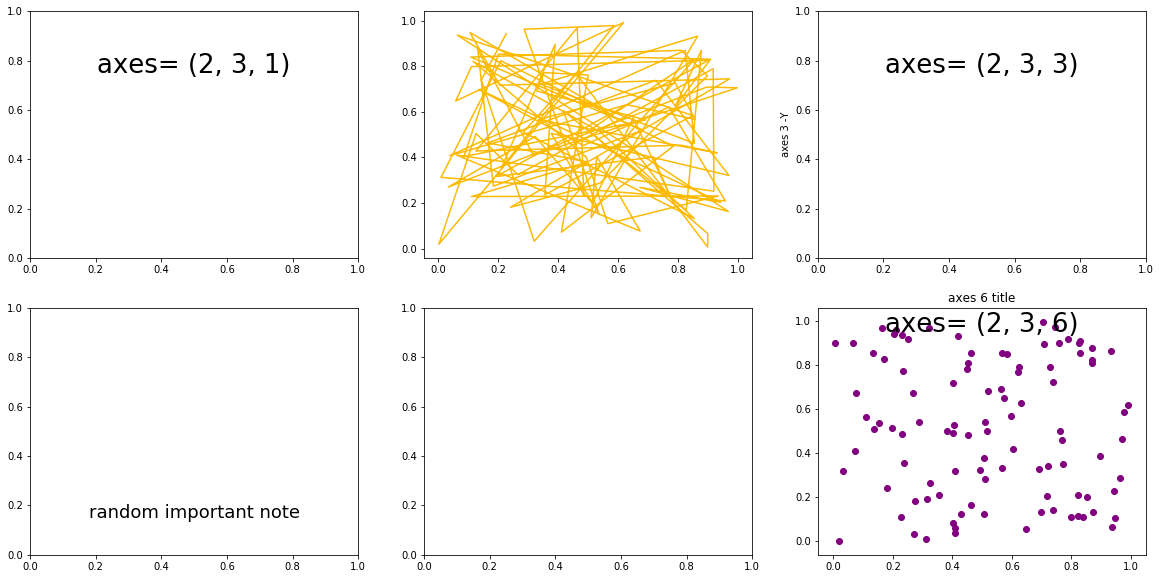

In [11]:
# object oriented API - each object is explictly managed
fig2 = plt.figure()

# list axes objects, in order you want them to appear - must match size of plt.subplots
fig2, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,10))

# add arbitrary labels
ax1.text(0.5, 0.75, f"axes= (2, 3, 1)", ha="center", fontsize = 26)
ax3.text(0.5, 0.75, f"axes= (2, 3, 3)", ha="center", fontsize = 26)
ax4.text(0.5, 0.15, f"random important note", ha="center", fontsize = 18)
ax6.text(0.5, 0.95, f"axes= (2, 3, 6)", ha="center", fontsize = 26)

# create random data
data1, data2, data3, data4 = np.random.rand(4, 100)

ax2.plot(data1, data2, color="#fcba03")
ax6.scatter(data2, data1, color="purple")

ax6.title.set_text("axes 6 title")
ax3.set_ylabel("axes 3 -Y")


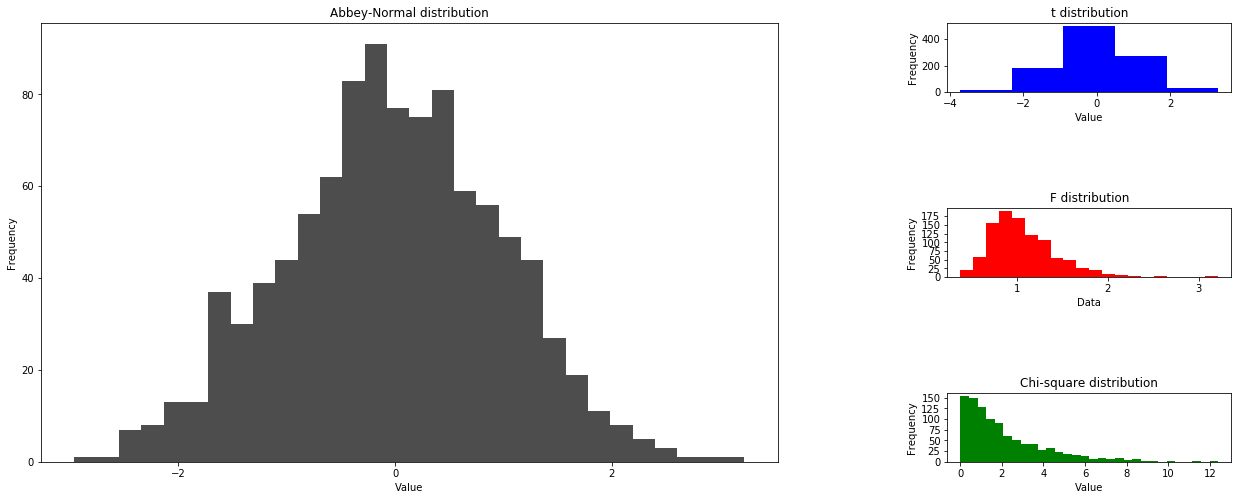

In [12]:
# use matplotlib to create subplots of different sizes
# credit:  scientifically sound website:  https://scientificallysound.org/2016/06/09/matplotlib-how-to-plot-subplots-of-unequal-sizes/

import matplotlib.gridspec as gridspec  # gridspec helps you controls placement, margins & padding

# Generate data
dist_norm = np.random.normal(loc=0, scale=1, size=1000)
dist_tdis = np.random.standard_t(df=29, size=1000)
dist_fdis = np.random.f(dfnum=59, dfden=28, size=1000)
dist_chsq = np.random.chisquare(df=2, size=1000)

# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# main subplot
plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Abbey-Normal distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(dist_norm, bins=30, color='0.30')

# small subplot 1
plt.subplot2grid((3,3), (0,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('t distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(dist_tdis, bins=5, color='b')

# small subplot 2
plt.subplot2grid((3,3), (1,2))
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=8)
plt.title('F distribution')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.hist(dist_fdis, bins=20, color='r')

# small subplot 3
plt.subplot2grid((3,3), (2,2))
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=8)
plt.title('Chi-square distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# fit subplots and save fig
fig.tight_layout()
fig.set_size_inches(w=20,h=8)

# able to export plots as files
# fig_name = 'plot.png'
# fig.savefig(fig_name)

Number of styles available in matplotlib:  26


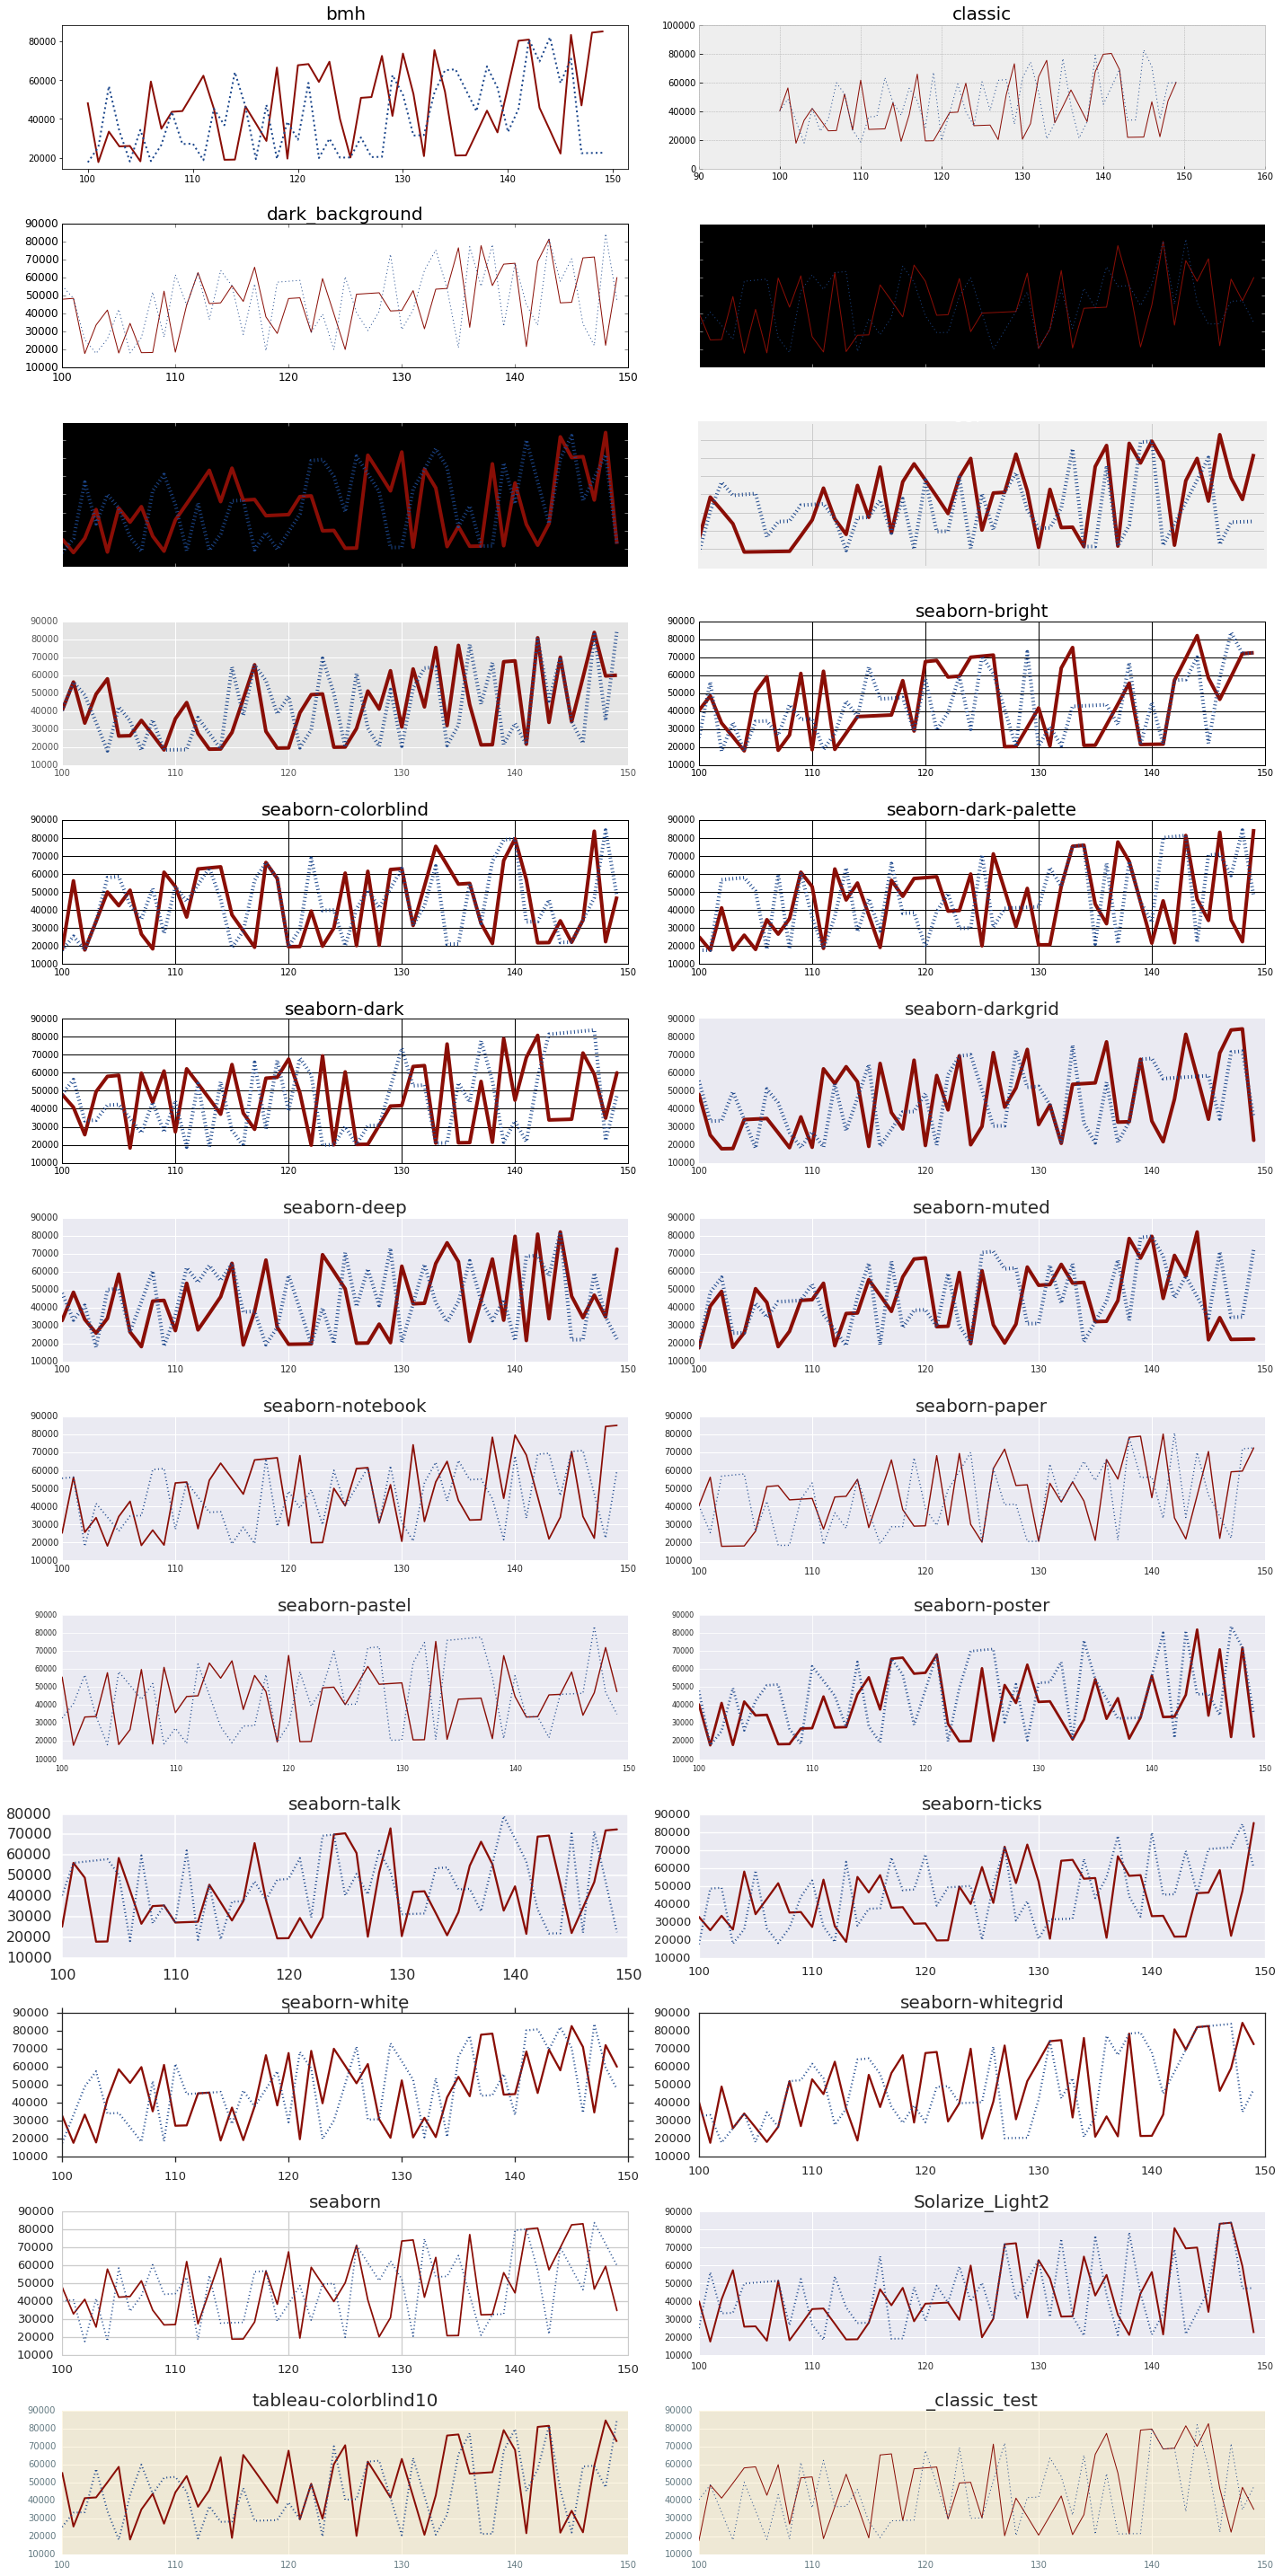

In [13]:
# matplot lib has some basic styles that are helpful

def plot_different_styles(style):
    style=str(style)
    plt.style.use(style)
    
    # create random data
    x_data = [x for x in range(100, 150)]
    y_data_01 = [int(10000*(1+(random.randint(1, 6)/100)*(x-24))) for x in range(100, 150)]
    y_data_02 = [int(10000*(1+(random.randint(1, 6)/100)*(x-24))) for x in range(100, 150)]

    plt.plot(x_data, y_data_01, linestyle="-", color="#8a0e06")
    plt.plot(x_data, y_data_02, linestyle="dotted", color="#1c478c")
    return plt

fig4, ax_list = plt.subplots(13,2, figsize=(20,40));

print("Number of styles available in matplotlib: ", len(plt.style.available))

for i, style in enumerate(plt.style.available):
    plt.subplot(13, 2, i+1)
    plt.title(str(style), fontsize=20)
    plot_different_styles(style)
    plt.tight_layout()


# Matplotlib - common challenges

- vast<br><br>
- "sometimes difficult"<br>
-- unfortunate object naming (axes vs axis)<br>
-- multiple APIs<br><br>
- different code styles in docs<br>
-- no canonical approach to most problems<br>
-- <strong>core docs </strong>not consistent<br>
-- <strong>public docs -</strong> widely mixed<br>


In [14]:
# skip
image_set = [file for file in Path('./images').rglob('*heaviest*')]
children = [widgets.Image(value=open(name, "rb").read()) for name in image_set]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(i))
tab


# Matplotlib - simple ways to improve...


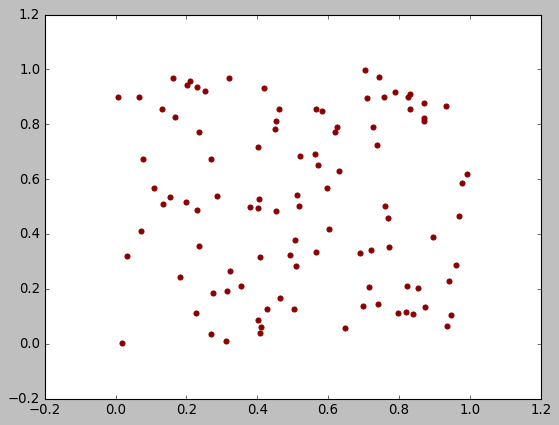

In [15]:
# basic output with no config

fig = plt
ax0 = fig.scatter(data2, data1, color="darkred")


# Simple ways to improve

- less is more

- color - fix background

- color - fix points / lines<br>
    -- color value<br>
    -- opacity<br>
    -- layer<br><br>

- set good axis ranges (not auto)

- remove chart junk (spines)

- meaningful labels / annotations



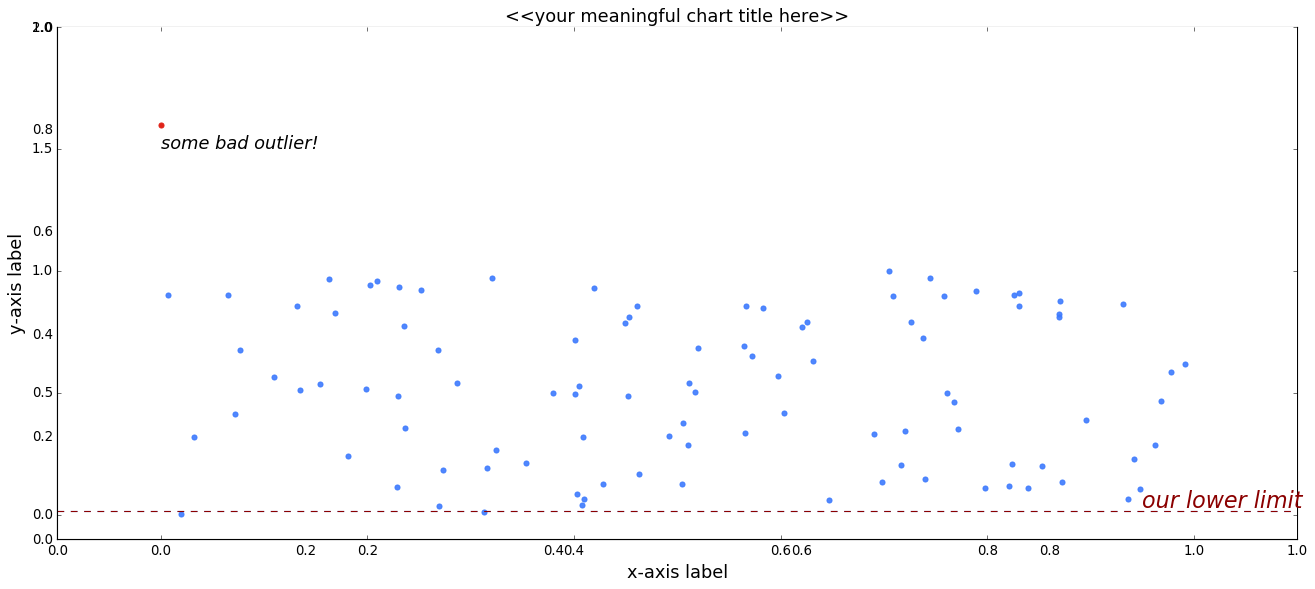

In [16]:
# matplotlib simple improvements - api version
# [Medium - simple ways to improve matplotlib -- pyplot](https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5) <br>
print("\n\n")
# use xkcd color library
better_color_scheme='xkcd:lightish blue'

# clean up background color (called facecolor)
fig, ax0 = plt.subplots(1, 1, figsize=(20,8), facecolor="white")

# create main axes with data
ax0 = fig.add_subplot(1, 1, 1)
ax0.scatter(data2, data1, color=better_color_scheme, alpha=0.9, zorder=1)


# meaningful simple labels
ax0.axes.set_title("<<your meaningful chart title here>>", fontsize=16)

ax0.axes.set_xlabel("x-axis label", fontsize=16)
ax0.axes.set_ylabel("y-axis label", fontsize=16)

# set good axis ranges
ax0.axes.set_xlim(-0.1, 1.1)
ax0.axes.set_ylim(-0.1, 2)

# remove extraneous chart junk
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# highlight baselines with horizontal or vertical lines
ax0.axhline(np.mean(data1)-.5, linestyle='--', color=better_color_scheme)
ax0.text(0.95, .03, "our lower limit", fontsize=20, fontstyle="italic", color="darkred");

# ordering objects - 
# order scatter and line differently
# ax0.axhline
ax0.axhline(np.mean(data1)-.5, linestyle='--', color="darkred", zorder=2)

# annotate important points
ax0.scatter(0, 1.6, color="#e02419")
ax0.text(0, 1.5, "some bad outlier!", fontsize=16, fontstyle="italic");


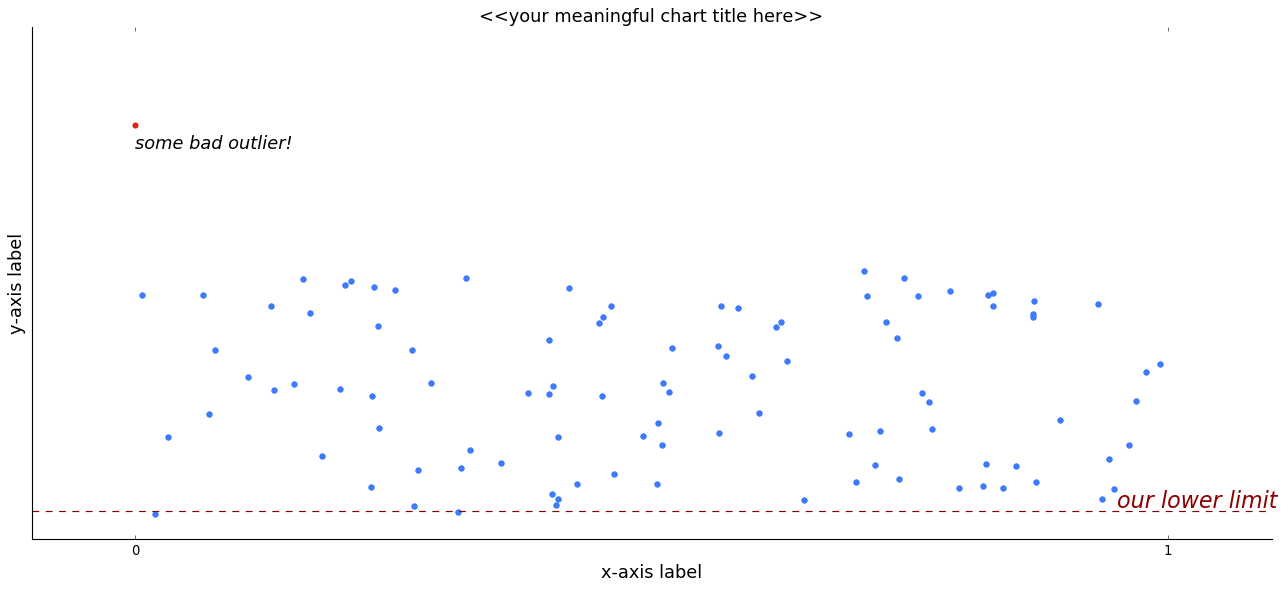

In [17]:
# matplotlib simple improvements - pyplot version
# [Medium - simple ways to improve matplotlib -- pyplot](https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5) <br>
print("\n\n")

# use xkcd color library
better_color_scheme='xkcd:lightish blue'

# clean up background color (called facecolor)
plt.figure(figsize=(20, 8), facecolor="white")

# meaningful simple labels
plt.title("<<your meaningful chart title here>>", fontsize=16)
plt.xlabel("x-axis label", fontsize=16)
plt.ylabel("y-axis label", fontsize=16)

# set good axis ranges
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 2)

# remove extraneous chart junk
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([round(min(data2),1), round(max(data2),1)])
cur_axes.axes.get_yaxis().set_ticks([])

# layer graph objects
# using alpha=0.9
plt.scatter(data2, data1, color=better_color_scheme, alpha=0.9)

# highlight baselines with horizontal or vertical lines
plt.axhline(np.mean(data1)-.5, linestyle='--', color=better_color_scheme)
plt.text(0.95, .03, "our lower limit", fontsize=20, fontstyle="italic", color="darkred");

# ordering objects - 
# order scatter and line differently
plt.scatter(data2, data1, color=better_color_scheme, alpha=0.9, zorder=1)
plt.axhline(np.mean(data1)-.5, linestyle='--', color="darkred", zorder=2)

# annotate important points
plt.scatter(0, 1.6, color="#e02419")
plt.text(0, 1.5, "some bad outlier!", fontsize=16, fontstyle="italic");


# Matplotlib - you need to know basic usage

# resources

[Matplotlib and the Future of Visualization in Python - 2013](https://jakevdp.github.io/blog/2013/03/23/matplotlib-and-the-future-of-visualization-in-python/)<br>

[Medium - Matplotlib Guide For People In A Hurry  -- pyplot ](https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff)  <br>

[Medium - simple ways to improve matplotlib -- pyplot](https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5) <br>

[matplotlib docs  -- mixed, both pyplot and OO API](https://matplotlib.org/) <br>

[matplotlib cheat sheet - DataCamp](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)

# [link to next chapter - Bokeh](http://localhost:8888/notebooks/notebooks/02_bokeh_chapter.ipynb)